In [28]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq

In [29]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def find_vals(X,Y,cut):
    dataX = X[cut:]
    dataY = Y[cut:]
    minn = min(dataY)
    sig_val = minn*0.5
    MeanLoc = np.where(dataY==minn)[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    FWHM = (Rpoint-Lpoint)   
    return (Mean,FWHM)

In [36]:
cd /Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-bottle-2bar/

/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-bottle-2bar


In [37]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob('*.txt')
#files.remove('.DS_Store')
files.sort()
files

['050-bottle.txt',
 '075-bottle.txt',
 '100-bottle.txt',
 '125-bottle.txt',
 '150-bottle.txt',
 '175-bottle.txt',
 '200-bottle.txt']

In [38]:
names = []
for q in range(0,len(files)):
    na = files[q].split('-')[0]
    names.append(na)
names

['050', '075', '100', '125', '150', '175', '200']

In [35]:
ml = 1e3
XvalsC=dict()
YvalsC=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    XvalsC[q] = Hold[0]*ml
    YvalsC[q] = Hold[1]*ml

In [39]:
ml = 1e3
XvalsB=dict()
YvalsB=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    XvalsB[q] = Hold[0]*ml
    YvalsB[q] = Hold[1]*ml

In [41]:
col = ['b','g','r','y','m','gray','salmon']

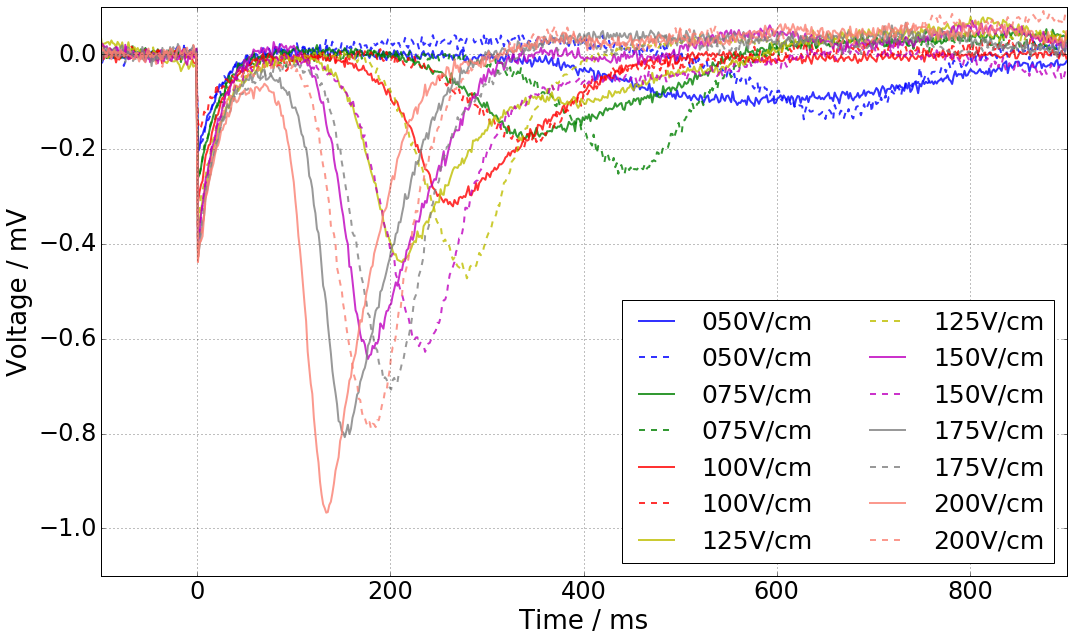

In [49]:
plt.figure(figsize=(15,9))

for q in range(0,len(files)):
    P=21
    PP=3
    eh = 80
    XX = savgol_filter(XvalsC[q],P,PP)
    YY = savgol_filter(YvalsC[q],P,PP)
    plt.plot(XX[0::eh],YY[0::eh],label=(names[q]+''+'V/cm'),alpha=0.8,color=col[q],linewidth=2)
    XX = savgol_filter(XvalsB[q],P,PP)
    YY = savgol_filter(YvalsB[q],P,PP)
    plt.plot(XX[0::eh],YY[0::eh],label=(names[q]+''+'V/cm'),alpha=0.8,color=col[q],linestyle='--',linewidth=2)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-.1*ml,900)
plt.ylim(-1.1,.1)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='lower right',fontsize=25,ncol=2)
plt.tight_layout()
#plt.savefig('ions-comp-90418.tif')
plt.show()

In [51]:
TriggerTime = find_nearest(Xvals[0],0)
Trigger     = np.where(Xvals[0]==TriggerTime)[0][0]
Cut = 2*Trigger


In [10]:
time,width = find_vals(Xvals[0],Yvals[0],Cut)
time

176.76984088402659

In [61]:
Velocity=[]
Efield =[]
FWHM  =[]
for q in range(0,len(files)):
    time,width = find_vals(XvalsC[q],YvalsC[q],Cut)
    V      = 20/(time*1e-3)
    Velocity.append(V)
    Efield.append(float(names[q]))
    FWHM.append(width)

In [62]:
for q in range(0,len(files)):
    time,width = find_vals(XvalsB[q],YvalsB[q],Cut)
    V      = 20/(time*1e-3)
    Velocity.append(V)
    Efield.append(float(names[q]))
    FWHM.append(width)
Velocity = np.array(Velocity)
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [56]:
Velocity

array([  35.37255691,   60.45032492,   75.95617018,   95.4971666 ,
        113.14147198,  127.41365073,  150.72845827,   29.44425133,
         44.54241724,   57.59550985,   72.09034967,   85.11729887,
         97.3943506 ,  110.9202373 ])

//anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


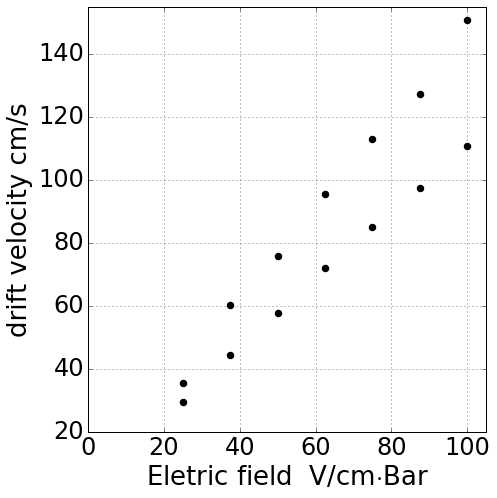

In [58]:
plt.figure(figsize=(7,7))
plt.scatter(Efield/2,Velocity,color='k',linewidth=3)

plt.xlim(0,105)
plt.ylim(20,155)
plt.xlabel(r'Eletric field  V/cm$\cdot$Bar',fontsize=26)
plt.ylabel(r'drift velocity cm/s',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('drift-both.tif')
plt.show()

In [14]:
Efield, FWHM = zip(*sorted(zip(Efield, FWHM)))
Efield = np.array(Efield)
FWHM = np.array(FWHM)

In [15]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)
popt
pcov

array([[ 11567483.53708543]])

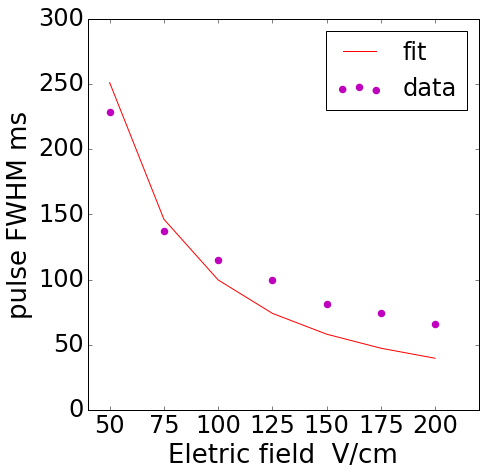

In [16]:
def ef(E,a):
    return a/(E)**(4/3)

popt,pcov = curve_fit(ef,Efield,FWHM)

'''dof = len(y)-len(popt)

plt.plot(x,y,'k+:',label='data')
plt.plot(x,exp_gaus(x,*popt),'r',label='fit')
plt.legend()
plt.axvline(x[(np.where(exp_gaus(x,*popt) == max(exp_gaus(x,*popt))))[0][0]], color='k', linestyle=':')
plt.xlabel('Bins')
plt.ylabel('Counts')
chi = chisquare(y,exp_gaus(x,*popt))
print("Chi-Squared/ndf =", chi[0]/dof)'''




plt.figure(figsize=(7,7))
plt.scatter(Efield,FWHM,color='m',linewidth=3,label='data')
plt.plot(Efield,ef(Efield,*popt),'r',label='fit')

plt.xlabel(r'Eletric field  V/cm',fontsize=26)
plt.ylabel(r'pulse FWHM ms',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(np.arange(50, 210, 25))

plt.legend(loc="upper right",fontsize=24)
plt.show()